<div align="left" style="font-weight: bold; font-family: Computer Modern; font-size: 24px; text-align: left; line-height: 1.5;">
    Federal University of Bahia (UFBA)
    <br>
    Department of Electrical and Computer Engineering
    <br>
    Course: ENGG67 - Introduction to Machine Learning
    <br>
    Professor: Antônio Fernandes
    <br>
    Students: Gabriel Correia and Márcio Barros
</div>


---

<h2 align="left" style="font-weight: bold; font-family: Computer Modern;font-size: 32px;text-align: left;">
    Evaluation 2 - Part 1: k-Nearest Neighbors (KNN) Algorithm
</h2>

The works presented here were written continuously, with considerations made at the end of each section to facilitate understanding for both the reader and the duo developing the code. We aimed to include as many observations and explanatory texts as possible, detailing each step of the programs. In the first question, it was even answered in two different ways so that the reader can draw their own conclusions regarding the application of the PCA algorithm on small databases. Meanwhile, in the second question, the application of PCA was essential for simplifying the analysis, eliminating redundancies, and identifying patterns.


<h2 align="left" style="font-weight: bold; font-family: Computer Modern;font-size: 22px;text-align: left;">
    1) Using the “Iris Flower Data Set,” address the classification problem using the k-NN algorithm. 
</h2> 


Results Obtained from the Program: 


C:\Users\GCorr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(



Initial Table (First 5 and Last 5 values):


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



Accuracy Table for each value of K (without PCA application):


,K,Average Accuracy
0,1,0.946667
1,2,0.946667
2,3,0.953333
3,4,0.953333
4,5,0.960000
...,...,...
15,16,0.933333
16,17,0.926667
17,18,0.940000
18,19,0.953333



Best value of K: 6


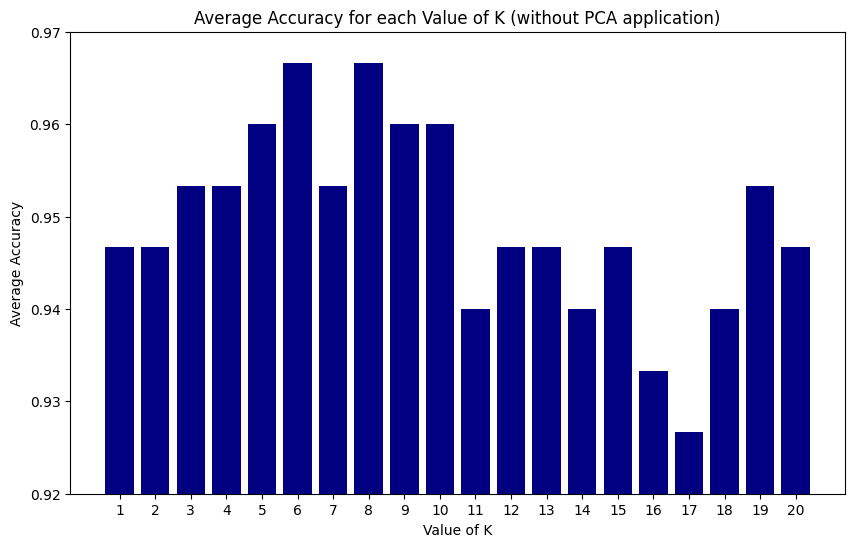

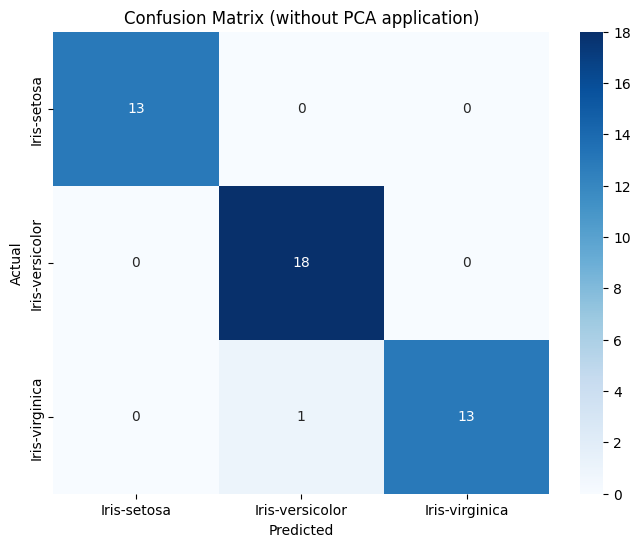


Performance Evaluation Metrics (without PCA application):


,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,13.000000
Iris-versicolor,0.947368,1.000000,0.972973,18.000000
Iris-virginica,1.000000,0.928571,0.962963,14.000000
accuracy,0.977778,0.977778,0.977778,0.977778
macro avg,0.982456,0.976190,0.978645,45.000000
weighted avg,0.978947,0.977778,0.977667,45.000000


In [9]:
# Importing library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

plt.close('all')
print('Results Obtained from the Program: ')

# Configure pandas to show the first and last 5 values
pd.set_option('display.max_rows', 10)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = requests.get(url, verify=False)

# Save the file to the local system
with open("iris.data", "wb") as file:
    file.write(response.content)

# Read the data from the downloaded CSV file
column_names = ["sepal_length", "sepal_width",
                "petal_length", "petal_width", "class"]
iris_data = pd.read_csv("iris.data", header=None, names=column_names)

# Display the initial table
print("\nInitial Table (First 5 and Last 5 values):")
display(pd.concat([iris_data.head(), pd.DataFrame(["..."] * (len(iris_data) - 10)).set_index([0]), iris_data.tail()]))

# Data preprocessing
X = iris_data.drop(columns=['class'])
y = iris_data['class']

# Standardization of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)

# Accuracy table for each value of K
k_values = list(range(1, 21))  # Testing K from 1 to 20
accuracy_values = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_scaled, y, cv=5)  # Cross-validation using 5 folds
    accuracy_values.append(scores.mean())
best_k = k_values[np.argmax(accuracy_values)]

# Accuracy table for each value of K
accuracy_table = pd.DataFrame({'K': k_values, 'Average Accuracy': accuracy_values})
print("\nAccuracy Table for each value of K (without PCA application):")
display(accuracy_table)
print(f"\nBest value of K: {best_k}")

# Plot bar chart for accuracy as a function of K
plt.figure(figsize=(10, 6))
plt.bar(accuracy_table['K'], accuracy_table['Average Accuracy'], color='navy') 
plt.xlabel('Value of K')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for each Value of K (without PCA application)')
plt.ylim(0.92, 0.97)  # Define the limits of the Y-axis

# Adjusts the X-axis to show only integer values without zero
plt.xticks(np.arange(1, 21, 1))
plt.show()

# Final training with the best value of K
final_classifier = KNeighborsClassifier(n_neighbors=best_k)
final_classifier.fit(x_train, y_train)

# Predictions on the test data
y_pred = final_classifier.predict(x_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=iris_data['class'].unique(), index=iris_data['class'].unique())

# Performance Evaluation Metrics
classification_rep = classification_report(y_test, y_pred, target_names=iris_data['class'].unique(), output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (without PCA application)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Show Performance Evaluation Metrics
print("\nPerformance Evaluation Metrics (without PCA application):")
display(classification_df)


CONSIDERATIONS:

In the last work, we observed that the database used did not contain data errors or significant noise. There were also few repetitions. Therefore, there is no need to preprocess the data, and we can directly proceed with normalization. In this cell, we also perform the split between the test and training groups, using the standard 70% for training and 30% for testing.

Another important point is that we do not need to apply the PCA technique for dimensionality reduction, as the Iris.data dataset is small. Thus, a direct analysis of its data can provide more meaningful insights than the correlated data after applying PCA.

The results from cross-validation reveal a good performance of the proposed model (we chose 5 folds as it is an acceptable value considering the size of the dataset, and through trial and error, it proved to be a good choice). The average accuracy, calculated over 5 folds, reaches approximately 96.67%.

The analysis of the confusion matrix highlights the robustness of the model, with true positive rates of 100% for the 'Iris-setosa' class and precision and recall percentages around 93% to 94% for the 'Iris-versicolor' and 'Iris-virginica' classes. The minimal presence of false positives and false negatives demonstrates the model's reliability.

The precision, ranging from 93% to 100%, emphasizes the model's ability to correctly predict the instances of each class. The recall, indicating the ability to capture all instances of a class, is consistent, fluctuating between 93% and 100%. The F1-score, balancing precision and recall, remains around 94% for all classes, reflecting a balanced performance.

In conclusion, the results position the model as competent in the task of classifying iris species. Its ability to generalize across different datasets suggests its usefulness in practical applications. However, it would be prudent to consider additional analyses and preprocessing treatments such as performing PCA.

---

Therefore, we will train the data with the application of PCA:

Results Obtained in the Program: 


C:\Users\GCorr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(



Initial Table (First 5 and Last 5 values):


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



Accuracy Table for each value of K (with PCA applied):


,K,Average Accuracy
0,1,0.873333
1,2,0.840000
2,3,0.900000
3,4,0.893333
4,5,0.913333
...,...,...
15,16,0.920000
16,17,0.920000
17,18,0.926667
18,19,0.913333



Best value of K: 18


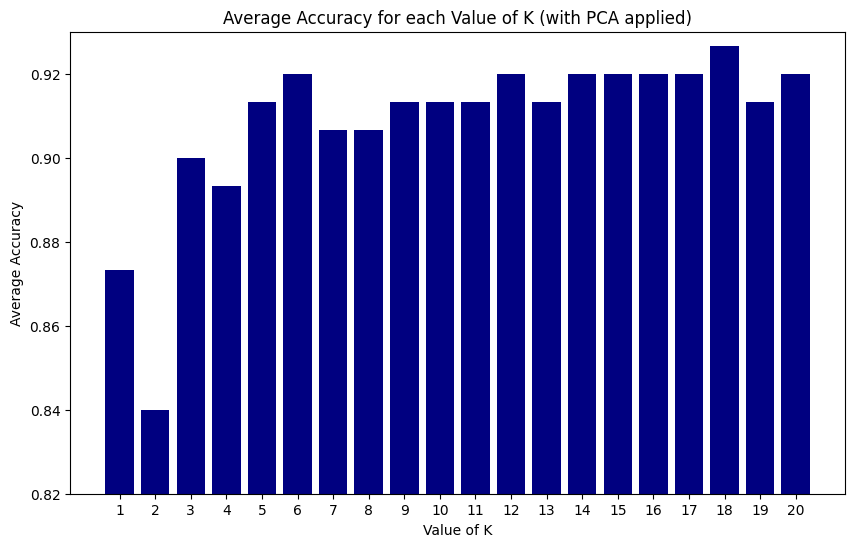

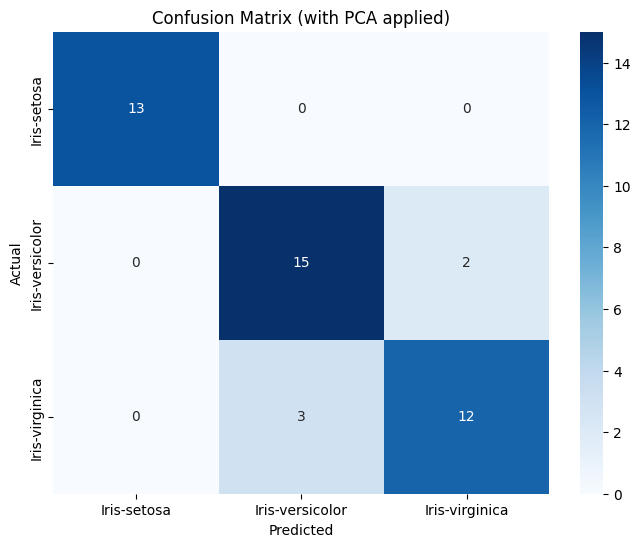


Performance Evaluation Metrics (with PCA applied):


,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,13.000000
Iris-versicolor,0.833333,0.882353,0.857143,17.000000
Iris-virginica,0.857143,0.800000,0.827586,15.000000
accuracy,0.888889,0.888889,0.888889,0.888889
macro avg,0.896825,0.894118,0.894910,45.000000
weighted avg,0.889418,0.888889,0.888560,45.000000


In [10]:
# Importing library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA  # Added for PCA

plt.close('all')
print('Results Obtained in the Program: ')

# Configure pandas to show the first and last 5 values
pd.set_option('display.max_rows', 10)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = requests.get(url, verify=False)

# Save the file locally
with open("iris.data", "wb") as file:
    file.write(response.content)

# Read the data from the downloaded CSV file
column_names = ["sepal_length", "sepal_width",
                "petal_length", "petal_width", "class"]
iris_data = pd.read_csv("iris.data", header=None, names=column_names)

# Display the initial table
print("\nInitial Table (First 5 and Last 5 values):")
display(pd.concat([iris_data.head(), pd.DataFrame(["..."] * (len(iris_data) - 10)).set_index([0]), iris_data.tail()]))

# Data preprocessing
X = iris_data.drop(columns=['class'])
y = iris_data['class']

# Standardization of the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reducing to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30)

# Accuracy table for each value of K
k_values = list(range(1, 21))  # Test K from 1 to 20
accuracy_values = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_pca, y, cv=5)  # Cross-validation using 5 folds
    accuracy_values.append(scores.mean())
best_k = k_values[np.argmax(accuracy_values)]

# Accuracy table for each value of K
accuracy_table = pd.DataFrame({'K': k_values, 'Average Accuracy': accuracy_values})
print("\nAccuracy Table for each value of K (with PCA applied):")
display(accuracy_table)
print(f"\nBest value of K: {best_k}")

# Plot bar chart for accuracy as a function of K
plt.figure(figsize=(10, 6))
plt.bar(accuracy_table['K'], accuracy_table['Average Accuracy'], color='navy')
plt.xlabel('Value of K')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for each Value of K (with PCA applied)')
plt.ylim(0.82, 0.93)  # Set Y-axis limits

# Adjust the X-axis to show only integer values without zero
plt.xticks(np.arange(1, 21, 1))
plt.show()

# Final training with the best value of K
final_classifier = KNeighborsClassifier(n_neighbors=best_k)
final_classifier.fit(x_train, y_train)

# Predictions on test data
y_pred = final_classifier.predict(x_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=iris_data['class'].unique(), index=iris_data['class'].unique())

# Performance Evaluation Metrics
classification_rep = classification_report(y_test, y_pred, target_names=iris_data['class'].unique(), output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (with PCA applied)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display Performance Evaluation Metrics
print("\nPerformance Evaluation Metrics (with PCA applied):")
display(classification_df)


By applying the PCA technique before data processing and training, we can see that the parameters change considerably. Among the changes that can be highlighted with the implementation of PCA before training, we can specify three main and most critical ones:

1. Dimensionality Reduction: 
[1] Without PCA, the original data (4 features: sepal_length, sepal_width, petal_length, petal_width) are directly used to train the KNN model. 
[2] With PCA, before training the model, the data are projected onto a lower-dimensional space. PCA identifies the directions (principal components) along which the data have the most variation. The number of principal components is specified (in this case, reduced to 2), and these components are used to train the model.

2. Impact on Visualization: 
[1] Without PCA, directly visualizing the original data can be challenging since they may have more than three dimensions. 
[2] With PCA, projecting the data into a two-dimensional space makes visualization easier. The bar chart shows the average accuracy as a function of K based on these two principal components.

3. Model Performance: 
[1] Without PCA, the KNN model is trained on the original data. 
[2] With PCA, the KNN model is trained on the principal components. Depending on the structure of the data and the amount of information retained in the chosen components, the model’s performance may vary, as seen with the change in the optimal value of K.

---